**IMPORTANT** <br> <ul> <li> Do **NOT** replace or remove this notebook (ipynb file)! Each cell has unique nbgrader's metadata and ID which, if changed outside the nbgrader, cannot pass the tests. Do **NOT** change the name of the file!</li> <li> To receive any credit, don't forget to **SUBMIT** your notebook when you are done! You can have multiple submissions before the deadline; only the last one is saved, including its timestamp.</li> <li>Before submitting, **Validate** your notebook to check if your codes pass all visible tests. </li> <li>Make sure you fill in any cell with the comment `# your code here`. Remove or comment the command `fail()` (in R), or `raise NotImplementedError` (in Python) and place your code there </li> </ul>

In [1]:
NAME = "Christian Olivares-Rodriguez"

---

# Intro to Keras API

- We'll do a little intro to the Keras API here, focusing on the sequential API.

Reference: 

- Tensorflow/Keras tutorial: https://www.tensorflow.org/tutorials/keras

- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Geron

In [2]:
## RUN THIS CELL FIRST to import TensorFlow and some helper modules

# TensorFlow and tf.keras
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras import layers

#Some scikitlearn stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# And the usual suspects
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Problem 1.

<br> <br>

In this problem we use the fashion MNIST dataset, which is similar to the MNIST numbers. There are 60,000 training images and 10,000 test images of 10 different clothing items. Each image has a resolution of 28x28 pixels, on a gray scale from 0 to 255.  

<img src="fashion-mnist-collection.png" width="500">


In [3]:
## Run to get the data
#####

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
#Confirm our shape and data type is a numpy array
display(type(train_images))

display(train_images.shape)

numpy.ndarray

(60000, 28, 28)

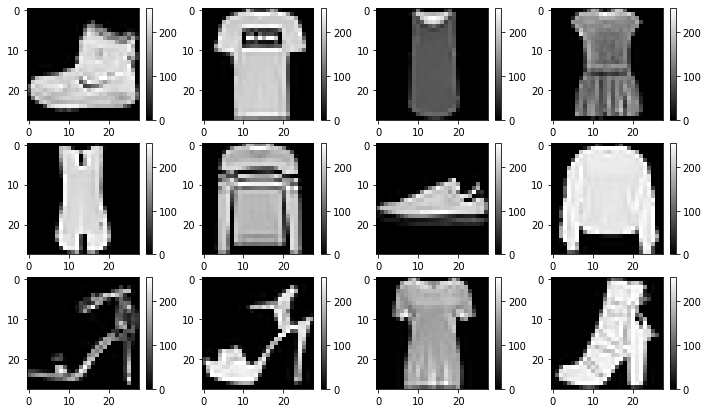

In [5]:
#Plot the first few train images:
#######

fig1, ax1 = plt.subplots(3, 4, figsize=(12,7))

#Flatten for easier indexing
ax1 = ax1.flatten()

#And plot:
for i in range(12):

    im = ax1[i].imshow(train_images[i], cmap='gray')
    fig1.colorbar(im,  ax=ax1[i], orientation='vertical')
    

* The `train_images` and `train_labels` are `numpy` arrays; together, they make the training dataset.

* Similarly, `test_images`, and `test_labels` are `numpy` arrays that make our test dataset, used for testing the performance of our neural net. 

So, the train-test split was already done for us, although we could combine these data and make our own split.

The images are 28x28 `numpy` arrays, with pixel values ranging from 0 to 255. The *labels* are integers ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

We create the `class_names` list with names of the 10 classes, to be used later.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Briefly Exploring the Data

Let's briefly explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [7]:
# How many images?
print('number of images:',len(train_images))

# Type for the 1st image (i.e. all images)
print('type:', type(train_images[0]))

# Shape of the 1st image (i.e. all images)
print('shape:', train_images[0].shape)

# What are minimum and maximum values in the entire train_images?
print('image value range:', (np.min(train_images), np.max(train_images)))

number of images: 60000
type: <class 'numpy.ndarray'>
shape: (28, 28)
image value range: (0, 255)


And the labels:

In [8]:
print('number of labels:', len(train_labels))
print('type:',type(train_images))
print('shape:', train_labels.shape)
print('set of label values:', set(train_labels))

number of labels: 60000
type: <class 'numpy.ndarray'>
shape: (60000,)
set of label values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


We see each label is an integer between 0 and 9 (representing 10 different fashion articles).

Similarly to training data, there are 10,000 images and labels in the test set. Again, each test image is represented as 28 x 28 pixels, and each test label has value 0-9.

In [9]:
print('test_images shape:', test_images.shape)
print('image value range:', (np.min(test_images), np.max(test_images)))

print('\ntest_labels shape:', test_labels.shape) # \n is for new line
print('set of label values', set(test_labels))

test_images shape: (10000, 28, 28)
image value range: (0, 255)

test_labels shape: (10000,)
set of label values {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


## Preprocessing the Data

The data must be preprocessed before training the network. We saw the range of pixel values is 0 to 255. 

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, simply divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [10]:
train_images = train_images / 255
test_images = test_images / 255

To verify that everything is okay after this transformation, we plot the first 12 images from the training set and indicate the class name.

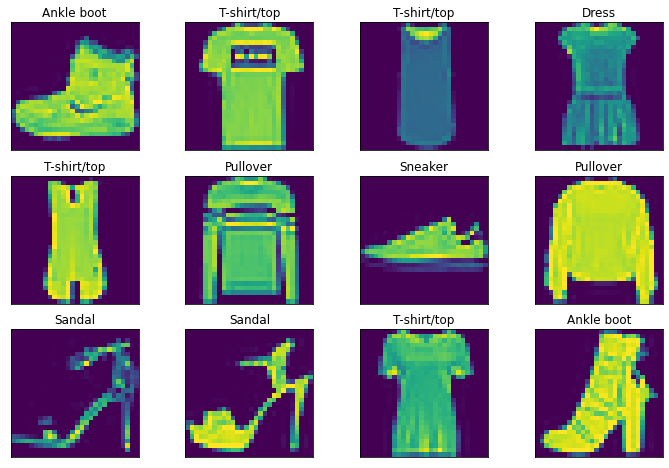

In [11]:
fig1, ax1 = plt.subplots(3, 4, figsize=(12,8))

#Flatten for easier indexing
ax1 = ax1.flatten()

#And plot:
for i in range(12):

    ax1[i].imshow(train_images[i], cmap='viridis') #Let's use viridis colormap this time
    
    ax1[i].set_title(class_names[train_labels[i]])
    
    #Get rid of the ticks on each axis:
    ax1[i].set_xticks([])
    ax1[i].set_yticks([])

## Building the Model

The following cell builds a simple feedforward model using the Keras Sequential API.

Building a neural network requires configuring the layers of the model and then compiling the model. Before that, we also set the `numpy` and `tensorflow` seeds for reproducibility.

In [12]:
np.random.seed(123) #set the seed in numpy
tf.random.set_seed(1234)  #set the seed in tensorflow

# Build the architecture of the model
###

mynet = tf.keras.Sequential([
    layers.Flatten(input_shape=(28,28), name='input_layer'), #Reshape/flatten the image to a single dimension
    layers.Dense(units=128, activation='relu', name='hidden1'),
    layers.Dense(units=10, activation='softmax', name='output_layer')
], name='mynet') #name is used in printout (can be different from 'mynet')

#Compile the model
mynet.compile(optimizer='rmsprop', #root mean square propagation optimizer
              loss='sparse_categorical_crossentropy', #measures model performance/accuracy
              metrics=['accuracy']) 


mynet.summary()

Model: "mynet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Remarks:**

<ul>
<li>
    The first layer in our neural net (created by <code>tf.keras.layers.Flatten()</code>) reformats the images from a two-dimensional array (28 by 28 pixels) to a one-dimensional array ($28 \times 28 = 784$ pixels). This is just unstacking rows of pixels in the image and lining them up into a single vector - some sort of "flattening". Since this layer only reformats the data, it has no parameters to estimate/learn. 
    </li>
<br>
<li>
    The other two layers (<code>hidden1</code> and <code>output_layer</code>) are "dense" in the sense that every node is connected to every other in the previous and the following layers. Note that we put 128 units (i.e. nodes) in the first of these two layers and relu as an activation function. Also, since the output variable has 10 catigories, we set units=10, and use softmax as an activation function to get estimates of probabilities for each of the 10 categories of our output variable.
    </li>
<br>
<li>
    In the compiling step, we chose <code>rmsprop</code> (root mean square propagation) optimizer. One could also try, say, <code>adam</code> (adaptive moment estimation).  <br>
Also, as a measure of performance (loss function), we chose <code>loss=sparse_categorical_entropy</code>. The function behind this value of <code>loss</code> argument is the same as for <code>categorical_entropy</code>, which is

$$-{1\over N} \sum_{i=1}^N\sum_{j=0}^{9}1_{\{y_i=j\}}\ln\hat{\pi}_j(x_i)$$

The difference between `loss=categorical_entropy` and `loss=sparse_categorical_entropy` is in the format of $y_i$'s that you use for your categorical output $Y$. If $y_i$'s are one-hot encoded (eg. for 3-class classifification: [1,0,0], [0,1,0], [0,0,1]), then we should use `categorical_entropy`. However, when $y_i$'s are integers (like in our case 0,1,...,9), we use `sparse_categorical_entropy`. <br>
As for <code>metrics</code>, we use `accuracy`, i.e. the proportion of correctly classified images.
    </li>
</ul>

- We called our model `mynet`. The `summary()` method of `mynet` prints out parameters to be estimated in each layer. Note that in the first dense layer we have 100480. For inputs, we have 128 nodes connected to 784 outputs from the flatten layer. Each node also has a single bias term. So, the $j$-th node has $z_j$ inputs given by $z_j=b_j+\sum_{i=1}^{784}w_{ij}x_i$, which means 785 parameters to estimate. Since $j=1,2,...,128$, we have $785 \cdot 128 = 100480$ parameters in the first dense layer to be estimated.

- In the second dense layer, we have $(128 + 1) \cdot 10 = 1290$ parameters to be estimated. So, in total, there are  $100480+1290=101770$ parameters in the `mynet` model to be estimated/trained.

### Training/Fitting the Model

For fitting the model, we use the [`fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method of our object `mynet`.

In [13]:
#fit the mynet model
mynet.fit(x=train_images, y=train_labels, epochs=5, batch_size=256)

Epoch 1/5
235/235 [==============================] - 1s 3ms/step - loss: 0.6578 - accuracy: 0.7737
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4498 - accuracy: 0.8419
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3980 - accuracy: 0.8587
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3656 - accuracy: 0.8683
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3441 - accuracy: 0.8754


We can see the value of the loss function (categorical cross-entropy), as well as the accuracy (proportion of correctly predicted trained samples) after each epoch. As training progresses, the value of the loss function decreases, the accuracy increases. However, in general, this doesn't necessarily have to be in monotonic order (decreassing loss and increasing accuracy). It may be very hard to fine-tune various hyperparameters (such as optimizer, learning rate, batch size, etc.) so that you get (overall) an improvement as the learning process goes. In addition, we only ran 5 epochs (for brevity). If we continue and run many epochs, the rate of improvement eventually slows down and we may eventually start overfitting.

Note that we chose the batch size, i.e. the number of samples to propagate through the neural net in each iteration, to be `batch_size=256`. Since there are $60,000$ training obs, each epoch consists of $\lceil 60,000/256\rceil=\lceil 234.375\rceil=235$ iterations (here, $\lceil ... \rceil$ means rounding up, ceiling).

**IMPORTANT!** If you rerun the `mynet.fit()` function, the initial values of the parameters will be different, resulting in the rerun having different otput (i.e. different estimated/learned values of the network parameters) from those in the first run. In order to reproduce the same results, first you need to run the cell that sets the `numpy` and `tensorflow` seeds and re-builds `mynet` object.

### Evaluating Performance

Next, we compare how the model performs on the test dataset:

In [14]:
test_loss, test_acc = mynet.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy:", test_acc)

313/313 - 0s - loss: 0.4044 - accuracy: 0.8515 - 440ms/epoch - 1ms/step

Test accuracy: 0.8514999747276306


### Predictions

We can use our model `mynet` to make predictions about some images.


In [15]:
predictions = mynet.predict(test_images)

#Note we get a 10,000 x 10 array:

print(predictions)

print('\nshape of predictions ndarray:', predictions.shape) 

[[2.9904184e-06 2.3918841e-07 1.2490528e-06 ... 1.4906596e-02
  2.0891067e-03 9.4707835e-01]
 [1.4323782e-04 1.3284203e-07 9.8944396e-01 ... 3.3503887e-11
  1.0092817e-05 3.4112799e-11]
 [1.2480241e-05 9.9997973e-01 1.2433944e-07 ... 1.3486366e-11
  4.5919526e-09 1.1816198e-11]
 ...
 [2.3308161e-03 5.4548747e-07 3.7078222e-04 ... 1.2800583e-05
  9.7215760e-01 8.7782718e-07]
 [5.3987441e-07 9.9958163e-01 2.1607468e-07 ... 6.2875407e-09
  2.2887017e-08 1.0963821e-07]
 [4.0604049e-05 3.8928897e-06 1.3066124e-04 ... 2.7134176e-02
  5.5002938e-03 6.6485134e-04]]

shape of predictions ndarray: (10000, 10)


We see the numpy array `predictions` is of shape 10,000 x 10. There are 10,000 test images, and thus, 10,000 rows of `predictions`. For each test image, we have a sequence of 10 probabilities, one for each of the labels 0,1,...,9. This is because we chose the output layer to have 10 nodes/units and `softmax` as activation function.

Below is the probability sequence for the first image (index=0). We also check that they sum up to 1 (or very nearly, due to rounding errors).

In [16]:
print(predictions[0])


from IPython.display import display, Math   #import display & Math to print latex syntax
display(Math(r'\sum_{j=0}^9 \pi^{(0)}_j = ' + str(np.sum(predictions[0]))))


[2.9904184e-06 2.3918841e-07 1.2490528e-06 2.4134790e-06 1.5514147e-06
 3.5908516e-02 8.9596915e-06 1.4906596e-02 2.0891067e-03 9.4707835e-01]


<IPython.core.display.Math object>

The largest value is the last one (label = 9) and is equal to $\pi^{(0)}_9 = 9.4707835\cdot 10^{-1} = 0.94707835$. The estimates of probabilities of all the rest of the labels are very low. So, our model seems to be pretty confident that it is label 9, i.e. Ankle Boot. 

Here below we use `np.argmax()` to find the index of the largest probability automatically (which we know is 9), and print out the label name.

In [17]:
#find index of the largest probability for the 1st image
print(np.argmax(predictions[0]))

#print the name of the corresponding category/label 
print(class_names[np.argmax(predictions[0])])

9
Ankle boot


Is our model correct?

In [18]:
test_labels[0]

9

Yes indeed!

<br>

We can make a nice graph to look at the full set of 10 class predictions for the 1st image. To do that, we create two functions, plot_image() and plot_value_array(). The code in the following cell is modified from the TensorFlow/Keras tutorial.



In [19]:
#Adapted from https://www.tensorflow.org/tutorials/keras/classification

#Have predictions array and the image of interest:
def plot_image(index, predictions_array, true_label, image):
    
    true_label, img = true_label[index], image[index]
    

    plt.imshow(img, cmap='Greys')

    #Prediction label
    predicted_label = np.argmax(predictions_array)
    
    #Did we get it?
    if predicted_label == true_label:
        color = (0,0.6,0)
    else:
        color = 'red'

    #Give the name of the prediction, and the percentage that it got in the voting, plus the true class:
    ######
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color = color)

    #Get rid of the ticks
    plt.xticks([])
    plt.yticks([])
    
    
#Bar plot for the predictions array:
def plot_value_array(index, predictions_array, true_label, x_names = True):
    true_label = true_label[index]
    
    plt.xticks(range(10))
    plt.yticks([])
    
    p = plt.bar(range(10), predictions_array, color=(0.7,0.7,0.7))  #paint all bars in gray

    predicted_label = np.argmax(predictions_array)

    p[predicted_label].set_color('red') #Color the predicted (hopefully tallest) bar in red
    p[true_label].set_color((0,0.8,0)) #Color the bar for the true label in green
    
    #Set the x and y ticks
    if (x_names):
        plt.xticks(range(10), class_names, rotation=60)
        
    plt.yticks(0.2*np.arange(6))


The function `plot_value_array()` plots a bar chart in the following way: First, it plots bars for each label/category, of height equal to the corresponding estimated probability. These bars are plotted in gray color. Then, it over-paints the predicted label (which is the tallest bar) in red. Then, it overpaints the bar for the true label in green.

Consequently, if our predicted label is correct, we will only see one green (which is also the tallest one) and the rest are gray bars. If, however, our model incorrectly predicted the label, the tallest bar (our prediction) will be in red, the green one is correct (i.e. the true label), and the rest are gray. By the way, if a probability is negligible (very small), the corresponding bar will not be ploted.

So, let's see the plot for the first test image (index=0).

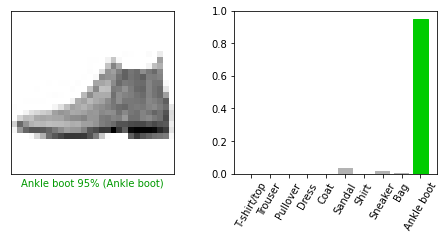

In [20]:
i = 0  #first image

plt.figure(figsize=(8,3))

#Plot the shape
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

#And the bar plot of prediction probabilities
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)


Great!

However, as we saw earlier, the model accuracy on the test data is $\approx 85\%$ (after 5 epochs). Below we see how our model incorrectly predicted the 13th item in the test data (index=12). We thought it was a sandal, but really it was labelled as a sneaker, alas.


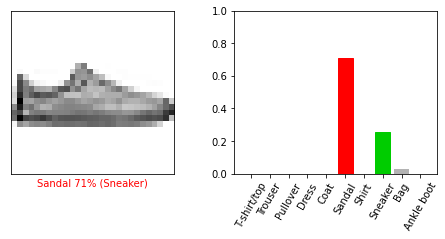

In [21]:
i = 12

plt.figure(figsize=(8,3))

#Plot the shape
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

#And the bar plot of prediction probabilities
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

As mentioned above, the red one is our predicted fashion item (Sandal), while the correct one is green (Sneaker). 

In the previous plot (for the 1st image), the predicted bar was first re-painted from gray to red, and then the correct bar (i.e. our predicted bar) was repainted from red to green.

Now, let's plot 12 selected images with their predictions. Note that the model can be wrong even when very confident (like for the upper-left and upper-right items in the following plot).


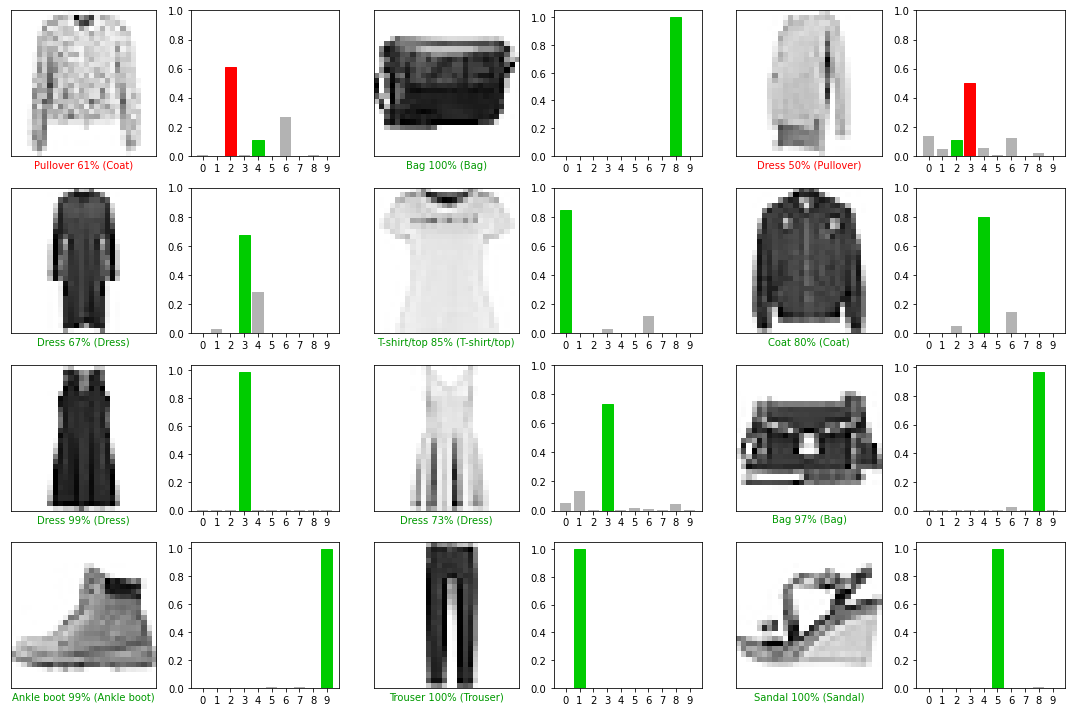

In [22]:
#list of indices of 12 selected images to plot
index_list = [51, 56, 66, 67, 71, 79, 86, 91, 95, 203, 214, 221] 

num_rows, num_cols = 4, 3    #want to make 4 by 3 subplots
num_images = num_rows*num_cols


plt.figure(figsize=(5*num_cols, 2.5*num_rows))

for i, j in enumerate(index_list):
    #Shape
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(j, predictions[j], test_labels, test_images)

    #And bar plot
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(j, predictions[j],  test_labels, x_names = False)

    
plt.tight_layout()
plt.show()

### Predict on a Single Image

<br>

Instead of predicting for all the test images, we can also use `predict()` method to predict the type of the fashion item for just one image (or any collection of images). But, we need to make sure we get the correct shape.

Using the following code, note that the shape of the `train_images` is 60,000 x 28 x 28 and compare that to the shape of a single (i.e. the first training) image, which is 28 x 28. We can get 1 x 28 x 28 one of two ways, as also demonstrated in the cell:

In [23]:
print(train_images.shape)

#Get the first image
img = train_images[0]
print(img.shape)


#Can expand the dimensions:
img = np.expand_dims(img,axis=0)
print(img.shape)


#Or can just do this to get correct shape:
img = train_images[[0]]
print(img.shape)

(60000, 28, 28)
(28, 28)
(1, 28, 28)
(1, 28, 28)


Now we can apply `predict`.

In [24]:
probs = mynet.predict(img)

print(probs)

print('\nPredicted label:',np.argmax(probs),'; Fashion item:',class_names[np.argmax(probs)])

[[4.5843032e-10 1.2998079e-10 1.1479474e-10 4.2543222e-09 7.0085812e-11
  3.6467685e-04 1.6064334e-09 3.1987336e-04 2.7024471e-06 9.9931276e-01]]

Predicted label: 9 ; Fashion item: Ankle boot



Now it's your turn.

<br> 

### Part (a)

Build a neural net called `mynet`using the `tf.keras.Sequential()` method. 

- Use `layers.Flatten()` to create first layer which just reformats the images appropriately. Name this layer 'input_layer'.

- Add to that a dense layer with 128 nodes/units and 'relu' as activation function. Name this layer 'hidden1'

- Add to that a dense layer with 512 nodes and 'tanh' as activation function. Name this layer 'hidden2' 

- Finally, add a dense layer with appropriate number of nodes/units and activation function, so that it represents the output layer with 10 estimated probabilities, one for each label. Name this layer 'output_layer' 

<br>

**IMPORTANT** 

- The following answer cell starts with setting the `numpy` and `tensorflow` seeds:

`np.random.seed(123)`

`tf.random.set_seed(1234)`

Do **NOT** remove these lines. This will enable reproducibility of the same results each time you run these cells and fit the model, which is necessary for you to get the expected answers.

- Note the following tests will call the layers by the above names, so you need to include the desired names for `mynet` to pass the tests.



In [25]:
np.random.seed(123) #set the seed in numpy (do NOT remove this)
tf.random.set_seed(1234)  #set the seed in tensorflow (do NOT remove this)

# your code here
mynet = tf.keras.Sequential([layers.Flatten(input_shape = (28, 28), name = 'input_layer'),  
                             layers.Dense(units = 128, activation = 'relu', name = 'hidden1'),  
                             layers.Dense(units = 512, activation = 'tanh', name ='hidden2'),  
                             layers.Dense(units = 10, activation = 'softmax', name ='output_layer')  
                            ], name = 'mynet')

In [26]:
#check whether there are 4 layers (including the input layer)
assert len(mynet.layers) == 4 , "Sorry, wrong answer"

#check whether hidden2 layer has 512 nodes
assert mynet.get_layer('hidden2').output_shape == (None, 512), "Sorry, wrong answer"

In [27]:
#check whether there are 128 by 512 weights in hidden2 layer
assert mynet.get_layer('hidden2').get_weights()[0].shape == (128,512), "Sorry, wrong answer"

#check whether there are 512 weights in hidden2 laywer
assert mynet.get_layer('hidden2').get_weights()[1].shape == (512,), "Sorry, wrong answer"

In [28]:
#check whether norm of vector of initial weights of the 1st node/unit in hidden2 are correct
assert abs(np.linalg.norm(mynet.get_layer('hidden2').get_weights()[0][:,0],ord=2) - 0.61390895) < 1.e-6, "Sorry, wrong answer"

#check whether initial bias of the 1st node/unit in hidden2 is correct
assert abs(mynet.get_layer('hidden2').get_weights()[1][0] - 0) < 1.e-6, "Sorry, wrong answer"

In [29]:
#check whether the answer is correct (hidden tests)



<br>

### Part (b) 

<br>

Compile the `mynet` neural net by setting adaptive moment (`adam`) as the optimizer; use `sparse_categorical_crossentropy` as the loss function, and `accuracy` as a measure of performance.

In [30]:

# your code here
mynet.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


In [31]:
#check whether the loss function in mynet is sparse_categorical_crossentropy

assert mynet.loss == 'sparse_categorical_crossentropy', "Sorry, wrong answer"

In [32]:
#check whether the 2nd and 3rd decimal digits of learning rate for the optimizer are 01
assert np.mod(np.floor(tf.keras.backend.get_value(mynet.optimizer.learning_rate) * 10**3), 100) == 1, "Sorry, wrong answer"

In [33]:
#check whether the learning rate is correct (hidden tests)



<br>

### Part (c)

<br>

Fit/train the neural net `mynet` using `train_images` and `train_labels` as training data. Use **10 epochs**. Set the **batch size to be 500**.

If everything is correct, the accuracy after the 1st epoch should be 0.7871, and after the 10th epoch it should be 0.9055.
<br>

**Important:** As mentioned earlier, if you want to rerun your code for fitting the model, you should first run the codes for configuring and compiling `mynet` neural net which start by first setting the seed to reproduce the expected results.  

In [34]:

# your code here
history = mynet.fit(train_images, train_labels, epochs = 10, batch_size = 500, verbose = 1)

Epoch 1/10
120/120 [==============================] - 1s 4ms/step - loss: 0.6109 - accuracy: 0.7871
Epoch 2/10
120/120 [==============================] - 0s 4ms/step - loss: 0.4044 - accuracy: 0.8537
Epoch 3/10
120/120 [==============================] - 0s 4ms/step - loss: 0.3585 - accuracy: 0.8702
Epoch 4/10
120/120 [==============================] - 0s 4ms/step - loss: 0.3325 - accuracy: 0.8786
Epoch 5/10
120/120 [==============================] - 1s 4ms/step - loss: 0.3099 - accuracy: 0.8881
Epoch 6/10
120/120 [==============================] - 0s 4ms/step - loss: 0.2996 - accuracy: 0.8901
Epoch 7/10
120/120 [==============================] - 0s 4ms/step - loss: 0.2870 - accuracy: 0.8954
Epoch 8/10
120/120 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.8975
Epoch 9/10
120/120 [==============================] - 0s 4ms/step - loss: 0.2628 - accuracy: 0.9026
Epoch 10/10
120/120 [==============================] - 0s 4ms/step - loss: 0.2571 - accuracy: 0.9055

In [35]:

#check whether the norm of vector of weights of the 2st node in hidden2 is correct
assert abs(np.linalg.norm(mynet.get_layer('hidden2').get_weights()[0][:,1]) - 0.78628486) < 1.e-4, "Sorry, wrong answer"


<br>

### Part (d)

<br>

Evaluate performance of the model on the test data. Use the `evaluate()` method of the object `mynet` to get the value of the loss function (call it `test_loss`) and accuracy (call it `test_acc`). So, your code should be of the form:

`test_loss, test_acc = <some expression>`


In [36]:

# your code here
test_loss, test_acc = mynet.evaluate(test_images, test_labels, verbose = 2)

313/313 - 0s - loss: 0.3529 - accuracy: 0.8736 - 476ms/epoch - 2ms/step


In [37]:
## check whether the 5th and 6th decimal digits of test_loss are 62
assert np.mod(np.floor(test_loss * 10**6), 100) == 62, "Sorry, wrong answer"

## check whether the 5th and 6th decimal digits of test_acc are 00
assert np.mod(np.floor(test_acc * 10**6), 100) == 0, "Sorry, wrong answer"

In [38]:
## check whether test_loss is correct (hidden tests)



In [39]:
## check whether test_acc is correct (hidden tests)



<br>

### Part (e)

<br>

Create object `predictions` using method `predict` of the `mynet` object to predict the fashion item on the test images.

In [40]:

# your code here
predictions = mynet.predict(test_images)

In [41]:
##check whether predictions is a numpy array
assert isinstance(predictions, np.ndarray), "Sorry, wrong answer"

##check whether predictions is of shape 10,000 x 10
assert predictions.shape == (10000,10), "Sorry, wrong answer"

##check whether estimated probabilities for each label for the 1st image are correct
assert np.linalg.norm(predictions[0] 
               - np.array([[5.66536391e-06, 2.07491013e-07, 
                            1.17116215e-05, 3.49672587e-06,
                            7.60758712e-06, 3.38210631e-03, 
                            5.04697055e-05, 2.42460519e-02,
                            7.93392828e-05, 9.72213268e-01]])) < 1.e-5, "Sorry, wrong answer"


In [42]:
##check whether probabilities for all labels sum up to ~1, for each of the first 5 images

assert np.linalg.norm(np.sum(predictions[:5], axis=1) - np.ones(5)) < 1.e-4, "Sorry, wrong answer"

In [43]:
##check whether the numpy array predictions is correct (hidden tests)



<br>

### Part (f)

<br>

We saw earlier that the 13th item (index=12) was incorrectly predicted by the first model (with one hidden layer). Let's see now how your model `mynet` predicts the label for this item.

Plot the image of the 13th item and bars with predicted/estimated probabilities for this item. Just like we did with the first model and this item, use functions `plot_image()` and `plot_value_array()` defined earlier in this notebook.

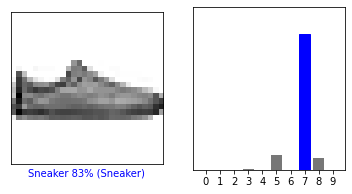

In [44]:

# your code here
def plot_image(index, predictions_array, true_label, img, class_names):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color = color)

def plot_value_array(index, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color =  "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

index = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(index, predictions[index], test_labels[index], test_images[index], class_names)
plt.subplot(1,2,2)
plot_value_array(index, predictions[index], test_labels[index])
plt.show()


## Problem 2:  Logistic Regression as Neural Net

<br>

Let's practice with neural nets just a little more by implementing logistic regression as a neural net. Recall that we will just have a single input layer with our input variables (features), and a single output neuron with a sigmoid activation function.

Let's try to predict the presence of angiographic heart disease, using the same heart.csv data that we used in past homeworks.

First, let's load our heart.csv data one last time:

In [45]:
#Load 'er up
heart_df = pd.read_csv("Heart.csv")

heart_df.head()

,PatientID,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


Let's just drop any observations with NaNs, and drop the `PatientID` column as well:

In [46]:
#A little cleaning
heart_df = heart_df.dropna()
heart_df = heart_df.drop(columns = ['PatientID'])

heart_df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


#### Some more pre-processing

Now, we have a mix of categorical and continuous data, with `ChestPain` and `Thal` categorical (and in need of encoding). We will use one-hot encoding to transform these variables. We can accomplish this with a combination of the `OneHotEncoder` object, along with `ColumnTransformer`, as demonstrated in the following bit of code:

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#Make a transformer named 'categorical_encoder' that uses OneHotEncoder() and will be applied to ChestPain and Thal
#All other variables will be unchanged: remainder='passthrough'
#sparse_threshold=0 ensures we get a dense matrix as output
####

ct = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['ChestPain', 'Thal'])],
                       remainder='passthrough', sparse_threshold=0)

#Do the fit and tranform:
transform = ct.fit_transform(heart_df)

#Embed back in a pandas DataFrame:
df = pd.DataFrame(transform, columns = ct.get_feature_names_out())

#Note new columns:
display(df.head())

#And the shape of our dataframe:
df.shape

,cat__ChestPain_asymptomatic,cat__ChestPain_nonanginal,cat__ChestPain_nontypical,cat__ChestPain_typical,cat__Thal_fixed,cat__Thal_normal,cat__Thal_reversable,remainder__Age,remainder__Sex,remainder__RestBP,remainder__Chol,remainder__Fbs,remainder__RestECG,remainder__MaxHR,remainder__ExAng,remainder__Oldpeak,remainder__Slope,remainder__Ca,remainder__AHD
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,63,1,145,233,1,2,150,0,2.3,3,0.0,No
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,37,1,130,250,0,0,187,0,3.5,3,0.0,No
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,41,0,130,204,0,2,172,0,1.4,1,0.0,No


(297, 19)

Now let's divide our DataFrame into input `X` and output `y`: We need all our variables to be of type `np.float32`. We construct our input and output as follows:

In [48]:
#Make X and y:

#Inputs
X = df.iloc[:,:18]
X = X.astype(np.float32)

#Output"
y = df.iloc[:,18]
y = (y == 'Yes').astype(np.float32)

#### Test/train split

Finally, run the following for a test/train split as usual:

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    shuffle=True, random_state=42)

### Part (a)

Now, construct a sequential neural net using Keras that has:

1. An input layer with 18 inputs; **name the input layer `input_layer`**
2. A single output node with a sigmoid activation function; **name this layer `output_layer`**.

**Name this model `lognet`**

Compile the model with the following parameters:

1. Use the `adam` optimizer
2. Use `binary_crossentropy` as the loss term
3. Save the `accuracy` metric

**ALSO: Set the numpy random number seed to `123`, and the tensorflow seed to `1234`**

In [50]:
np.random.seed(123) #set the seed in numpy
tf.random.set_seed(1234)  #set the seed in tensorflow

# your code here
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam

lognet = Sequential() 
lognet.add(InputLayer(input_shape = (18,), name = 'input_layer'))
lognet.add(Dense(1, activation = 'sigmoid', name = 'output_layer'))

lognet.compile(optimizer = Adam(), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [51]:
#check whether norm of vector of initial weights of the output layer is correct
assert abs(np.linalg.norm(lognet.get_layer('output_layer').get_weights()[0][:,0],ord=2) - 1.2636665) < 1.e-4, "Sorry, wrong answer"


### Part (b): Fit the model

Fit the model, training for **1,000 epochs** with batch sizes of **50.**

Then, determine the accuracy of the model on both the training and datasets. Assign these to the variables `train_acc` and `test_acc`, respectively. Note that if you wish to re-fit the model, you should re-initialize the model architecture with the specified random number seeds above.

Also, you may wish to use the argument `verbose=0` to suppress the training output.

In [52]:
# your code here
history = lognet.fit(X_train, y_train, epochs = 1000, batch_size = 50, verbose = 0)

train_loss, train_acc = lognet.evaluate(X_train, y_train, verbose = 0)
test_loss, test_acc = lognet.evaluate(X_test, y_test, verbose = 0)

In [53]:
#check whether the 3rd and 4th decimal digits of train_acc are 40 
assert np.mod(np.floor(train_acc * 10**4), 100) == 40, "Sorry, wrong answer"

#check whether the 3nd and 4th decimal digits of test_acc are 88 
assert np.mod(np.floor(test_acc * 10**4), 100) == 88, "Sorry, wrong answer"

In [54]:
#check whether the answer is correct (hidden tests)


### Part (c): Predictions on train dataset

Get the predictions of the trained model on the **training** dataset. Construct a confusion matrix as a numpy array, following the scikit-learn convention with truth/actual values across the horizontal axis, and model predictions down the vertical axis. Therefore, true negatives are at index (0,0), false positives are at index (0,1), and so on.

(I suggest use you the `confusion matrix` function from `sklearn.metrics`)

Assign your answer to the variable `cm_train`.

In [55]:
# your code here
y_train_pred = (lognet.predict(X_train) > 0.5).astype("int32")

cm_train = confusion_matrix(y_train, y_train_pred)

In [56]:
## test whether the first row of cm_train is correct
c = np.array([100, 11])

assert np.isclose(cm_train[0,:], c).sum() == 2, "Sorry, wrong answer"

In [57]:
#check whether the answer is correct (hidden tests)


### Part (d): Predictions on test dataset

Now get the predictions of the trained model for the **testing** dataset. Construct a confusion matrix as a numpy array, again using the scikit-learn convention.

Assign your answer to the variable `cm_test`.

In [58]:
# your code here
y_test_pred = (lognet.predict(X_test) > 0.5).astype("int32")

cm_test = confusion_matrix(y_test, y_test_pred)

In [59]:
## test whether the first row of cm_test is correct
c = np.array([46, 3])

assert np.isclose(cm_test[0,:], c).sum() == 2, "Sorry, wrong answer"

In [60]:
#check whether the answer is correct (hidden tests)


### Part (e): ROC Curves

Construct ROC curves for both the training and testing datasets. Calculate the area under the curve (AUC) for each dataset.

Assign these values to `auc_train` and `auc_test`.


In [61]:
# your code here
from sklearn.metrics import roc_curve, auc

y_train_prob = lognet.predict(X_train)
y_test_prob = lognet.predict(X_test)

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

auc_train = roc_auc_train
auc_test = roc_auc_test

In [62]:
#check whether the 3rd and 4th decimal digits of auc_train are 66 
assert np.mod(np.floor(auc_train * 10**4), 100) == 66, "Sorry, wrong answer"

#check whether the 3nd and 4th decimal digits of auc_test are 33 
assert np.mod(np.floor(auc_test * 10**4), 100) == 33, "Sorry, wrong answer"

In [63]:
#check whether the answer is correct (hidden tests)



#### Figure:

Now make a figure depicting both ROC curves. Your curves should resemble those below.

<img src="roc1.png" style="width: 625px;"/>

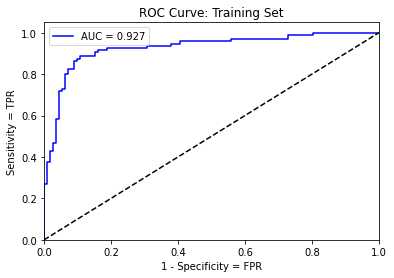

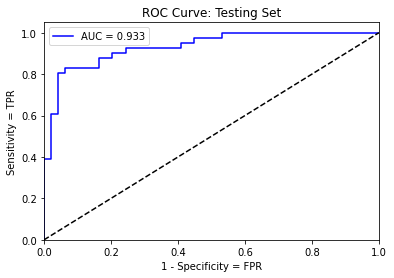

In [64]:
# your code here
#Training set
plt.figure()
plt.plot(fpr_train,
         tpr_train,
         color = 'blue',
         label = 'AUC = %0.3f' % roc_auc_train)
plt.plot([0, 1],
         [0, 1],
         color = 'black',
         linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity = FPR')
plt.ylabel('Sensitivity = TPR')
plt.title('ROC Curve: Training Set')
plt.legend(loc = "upper left")

#Test set
plt.figure()
plt.plot(fpr_test,
         tpr_test,
         color = 'blue',
         label = 'AUC = %0.3f' % roc_auc_test)
plt.plot([0, 1],
         [0, 1],
         color = 'black',
         linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity = FPR')
plt.ylabel('Sensitivity = TPR')
plt.title('ROC Curve: Testing Set')
plt.legend(loc = "upper left")

### Part (f): Add a Layer

Finally, add a dense hidden layer to your model with 100 nodes and a sigmoid activation function.

That is, construct a new Sequential model with an input layer that takes 18 inputs, and a dense hidden layer with 100 nodes and a sigmoid activation function. Again, use `adam` as the optimizer and `binary_crossentropy` as your loss function.

Fit the model with **1,000 epochs** and batch size of **50.** Use the argument `verbose=0` to suppress the output if you like.

*Once again, set the numpy random number seed to `123`, and the tensorflow seed to `1234`*

In [65]:

# your code here
np.random.seed(123)  
tf.random.set_seed(1234) 

new_model = Sequential([ InputLayer(input_shape = (18,)),
                        Dense(100, activation = 'sigmoid'),
                        Dense(1, activation = 'sigmoid')])

new_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = new_model.fit(X_train, y_train, epochs = 1000, batch_size = 50, verbose = 0)

new_train_loss, new_train_acc = new_model.evaluate(X_train, y_train, verbose = 0)
new_test_loss, new_test_acc = new_model.evaluate(X_test, y_test, verbose = 0)


### New ROC Curves

Now, plot the ROC curves for the training and testing data with this new model. You should observe that, while performance on the training dataset is great, performance on the testing data has degraded somewhat, as follows:

<img src="roc2.png" style="width: 625px;"/>

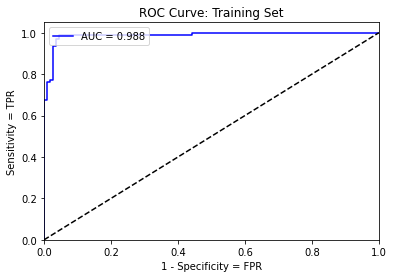

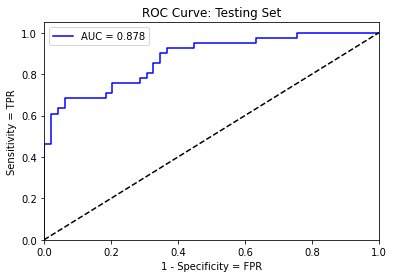

In [66]:
# your code here
y_train_prob_new = new_model.predict(X_train).ravel()
y_test_prob_new = new_model.predict(X_test).ravel()

fpr_train_new, tpr_train_new, _ = roc_curve(y_train, y_train_prob_new)
roc_auc_train_new = auc(fpr_train_new, tpr_train_new)

fpr_test_new, tpr_test_new, _ = roc_curve(y_test, y_test_prob_new)
roc_auc_test_new = auc(fpr_test_new, tpr_test_new)

#Training set
plt.figure()
plt.plot(fpr_train_new,
         tpr_train_new,
         color = 'blue',
         label = 'AUC = %0.3f' % roc_auc_train_new)
plt.plot([0, 1],
         [0, 1],
         color = 'black',
         linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity = FPR')
plt.ylabel('Sensitivity = TPR')
plt.title('ROC Curve: Training Set')
plt.legend(loc = "upper left")

#Test set
plt.figure()
plt.plot(fpr_test_new,
         tpr_test_new,
         color = 'blue',
         label = 'AUC = %0.3f' % roc_auc_test_new)
plt.plot([0, 1],
         [0, 1],
         color = 'black',
         linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity = FPR')
plt.ylabel('Sensitivity = TPR')
plt.title('ROC Curve: Testing Set')
plt.legend(loc = "upper left")


<br>

### Problem 3: Simple Digits Dataset


In Problem 1, we worked with the `fashion_mnist` dataset by loading it from `keras.datasets` submodule.

Let's now work with the simple digits available through scikit-learn. This is a set of 8x8 digits and a copy of the test set of the UCI ML hand-written digits dataset. Run the cell below to load the digits and split into a test/train set.

Briefly explore this dataset, and construct a neural net to classify the handwritten digits, similar to the work with `fashion_mnist` above. Train this net, and briefly characterize its performance. At a minimum, you should:

1. Plot some of the digits
2. Train a model and report the overall accuracy on the test dataset

Model details are up to you. Note that you can add as many code cells as you like below to complete the task. Please indicate in the comments where you calculate your final accuracy value, and print this out.

In [67]:
#Load the digits:
####

from sklearn.datasets import load_digits

images, labels = load_digits(return_X_y=True)
X_train, y_train = images[:1400], labels[:1400]
X_test, y_test = images[1400:], labels[1400:]

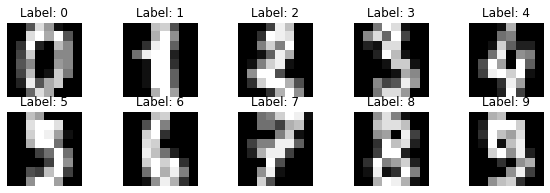

Accuracy of the MLPClassifier on the test: 91.94%


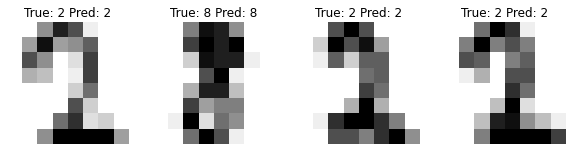

In [73]:
# your code here
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

fig, axes = plt.subplots(2, 5, figsize = (10, 3))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_train[i].reshape(8, 8), cmap = 'gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes = (64, 64), activation = 'relu', max_iter = 100, verbose = False)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the MLPClassifier on the test: {accuracy * 100:.2f}%")

fig, axes = plt.subplots(1, 4, figsize = (10, 3))
for ax, image, prediction, true_label in zip(axes, X_test.reshape(-1, 8, 8), y_pred, y_test):
    ax.set_axis_off()
    ax.imshow(image,
              cmap = plt.cm.gray_r,
              interpolation = 'nearest')
    ax.set_title(f'True: {true_label} Pred: {prediction}')